<a href="https://colab.research.google.com/github/richardfan98/IntroMLProject/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
a = files.upload()

Saving NCAATourneyCompactResults.csv to NCAATourneyCompactResults.csv


In [0]:
import pandas as pd
import numpy as np
regular = pd.read_csv('RegularSeasonDetailedResults.csv')
ncaa = pd.read_csv('NCAATourneyCompactResults.csv')

In [0]:
#find all unique teams
regular_season = regular.groupby('Season')
regular2017 = regular_season.get_group(2017)
teams2017 = list(regular2017['WTeamID'].unique()) + list(regular2017['LTeamID'].unique())
teams2017 = np.array(teams2017)
teams2017 = np.unique(teams2017)
teams2017 

In [0]:
# create a df that has all teams ready for data import
df2017 = pd.DataFrame(teams2017,columns=['Team'])
z = np.zeros([len(teams2017),1])
df2017['Points'] = z
df2017['FGM'], df2017['FGA'] = z, z
df2017['FGM3'],df2017['FGA3'], df2017['FTM'], df2017['FTA'], df2017['OR'], df2017['DR'], df2017['Ast'], df2017['TO'], df2017['Stl'], df2017['Blk'], df2017['PF'] = z,z,z,z,z,z,z,z,z,z,z
df2017['Games'] = z
df2017 = df2017.set_index('Team')
df2017


In [0]:
# Find difference in each game
r = regular2017.copy()
r['Points'] = r.apply(lambda col: col.WScore - col.LScore, axis = 1)
r['FGM'] = r.apply(lambda col: col.WFGM - col.LFGM, axis = 1)
r['FGA'] = r.apply(lambda col: col.WFGA - col.LFGA, axis = 1)
r['FGM3'] = r.apply(lambda col: col.WFGM3 - col.LFGM3, axis = 1)
r['FGA3'] = r.apply(lambda col: col.WFGA3 - col.LFGA3, axis = 1)
r['FTM'] = r.apply(lambda col: col.WFTM - col.LFTM, axis = 1)
r['FTA'] = r.apply(lambda col: col.WFTA - col.LFTA, axis = 1)
r['OR'] = r.apply(lambda col: col.WOR - col.LOR, axis = 1)
r['DR'] = r.apply(lambda col: col.WDR - col.LDR, axis = 1)
r['Ast'] = r.apply(lambda col: col.WAst - col.LAst, axis = 1)
r['TO'] = r.apply(lambda col: col.WTO - col.LTO, axis = 1)
r['Stl'] = r.apply(lambda col: col.WStl - col.LStl, axis = 1)
r['Blk'] = r.apply(lambda col: col.WBlk - col.LBlk, axis = 1)
r['PF'] = r.apply(lambda col: col.WPF - col.LPF, axis = 1)
r

In [0]:
#move processed season data to empty df
for i in list(r.index):
  win = r.loc[i]['WTeamID']
  df2017.loc[win]['Games'] += 1
  lose = r.loc[i]['LTeamID']
  df2017.loc[lose]['Games'] += 1
  for j in list(set(df2017.columns) - set(['Games'])):
      df2017.loc[win][j] += r.loc[i][j] 
      df2017.loc[lose][j] -= r.loc[i][j]

In [0]:
#make all the data as average statistics
df2017_avg = df2017.copy()
df2017_avg['Points_Avg'] = df2017_avg.apply(lambda col: col.Points / col.Games, axis = 1)
df2017_avg['FGM_Avg'] = df2017_avg.apply(lambda col: col.FGM / col.Games, axis = 1)
df2017_avg['FGA_Avg'] = df2017_avg.apply(lambda col: col.FGA / col.Games, axis = 1)
df2017_avg['FGM3_Avg'] = df2017_avg.apply(lambda col: col.FGM3 / col.Games, axis = 1)
df2017_avg['FGA3_Avg'] = df2017_avg.apply(lambda col: col.FGA3 / col.Games, axis = 1)
df2017_avg['FTM_Avg'] = df2017_avg.apply(lambda col: col.FTM / col.Games, axis = 1)
df2017_avg['FTA_Avg'] = df2017_avg.apply(lambda col: col.FTA / col.Games, axis = 1)
df2017_avg['OR_Avg'] = df2017_avg.apply(lambda col: col.OR / col.Games, axis = 1)
df2017_avg['DR_Avg'] = df2017_avg.apply(lambda col: col.DR / col.Games, axis = 1)
df2017_avg['Ast_Avg'] = df2017_avg.apply(lambda col: col.Ast / col.Games, axis = 1)
df2017_avg['TO_Avg'] = df2017_avg.apply(lambda col: col.TO / col.Games, axis = 1)
df2017_avg['Stl_Avg'] = df2017_avg.apply(lambda col: col.Stl / col.Games, axis = 1)
df2017_avg['Blk_Avg'] = df2017_avg.apply(lambda col: col.Blk / col.Games, axis = 1)
df2017_avg['PF_Avg'] = df2017_avg.apply(lambda col: col.PF / col.Games, axis = 1)
df2017_avg = df2017_avg[['Points_Avg','FGM_Avg','FGA_Avg','FGM3_Avg','FGA3_Avg','FTM_Avg','FTA_Avg','OR_Avg','DR_Avg','Ast_Avg','TO_Avg','Stl_Avg','Blk_Avg','PF_Avg']]
df2017_avg

In [0]:
# Clean ncaa data for a target column
# Instead of winning and losing teams, we let smaller id teams to be team 1 and whether team 1 wins to be result
ncaa1 = ncaa.copy()
ncaa1 = ncaa1[['WTeamID','LTeamID']]
ncaa1['Team1'] = ncaa1.apply(lambda row: min(row.WTeamID, row.LTeamID), axis =1)
ncaa1['Team2'] = ncaa1.apply(lambda row: max(row.WTeamID, row.LTeamID), axis =1)
ncaa1['Results'] = ncaa1.apply(lambda row: int(row.WTeamID == row.Team1), axis = 1)
ncaa1 = ncaa1[['Team1','Team2', 'Results']]


,Team1,Team2,Results
0,1116,1234,1
1,1120,1345,1
2,1207,1250,1
3,1229,1425,1
4,1242,1325,1
...,...,...,...
2179,1181,1242,0
2180,1403,1437,0
2181,1260,1276,0
2182,1242,1437,0


In [0]:
# Put data for both teams together in one table
zz = np.zeros([len(ncaa1),28])
zz = pd.DataFrame(zz)
ncaa_train = pd.concat([ncaa1,zz],axis = 1)
ncaa_train.columns = ['Team1', 'Team2','Results','Points_Avg1', 'FGM_Avg1', 'FGA_Avg1', 'FGM3_Avg1', 'FGA3_Avg1', 'FTM_Avg1',
       'FTA_Avg1', 'OR_Avg1', 'DR_Avg1', 'Ast_Avg1', 'TO_Avg1', 'Stl_Avg1',
       'Blk_Avg1', 'PF_Avg1','Points_Avg2', 'FGM_Avg2', 'FGA_Avg2', 'FGM3_Avg2', 'FGA3_Avg2', 'FTM_Avg2',
       'FTA_Avg2', 'OR_Avg2', 'DR_Avg2', 'Ast_Avg2', 'TO_Avg2', 'Stl_Avg2',
       'Blk_Avg2', 'PF_Avg2']
ncaa_train

,Team1,Team2,Results,Points_Avg1,FGM_Avg1,FGA_Avg1,FGM3_Avg1,FGA3_Avg1,FTM_Avg1,FTA_Avg1,OR_Avg1,DR_Avg1,Ast_Avg1,TO_Avg1,Stl_Avg1,Blk_Avg1,PF_Avg1,Points_Avg2,FGM_Avg2,FGA_Avg2,FGM3_Avg2,FGA3_Avg2,FTM_Avg2,FTA_Avg2,OR_Avg2,DR_Avg2,Ast_Avg2,TO_Avg2,Stl_Avg2,Blk_Avg2,PF_Avg2
0,1116,1234,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1120,1345,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1207,1250,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1229,1425,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1242,1325,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,1181,1242,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,1403,1437,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2181,1260,1276,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2182,1242,1437,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#Add data to game matchup table from data table
for i in list(ncaa_train.index): 
  T1 = ncaa_train.loc[i]['Team1'] 
  T2 = ncaa_train.loc[i]['Team2'] 
  ncaa_train.loc[i,'Points_Avg1'] = df2017_avg.loc[T1,'Points_Avg']
  ncaa_train.loc[i,'Points_Avg2'] = df2017_avg.loc[T2,'Points_Avg']
  ncaa_train.loc[i,'FGM_Avg1'] = df2017_avg.loc[T1,'FGM_Avg']
  ncaa_train.loc[i,'FGM_Avg2'] = df2017_avg.loc[T2,'FGM_Avg']
  ncaa_train.loc[i,'FGA_Avg1'] = df2017_avg.loc[T1,'FGA_Avg']
  ncaa_train.loc[i,'FGA_Avg2'] = df2017_avg.loc[T2,'FGA_Avg']
  ncaa_train.loc[i,'FGM3_Avg1'] = df2017_avg.loc[T1,'FGM3_Avg']
  ncaa_train.loc[i,'FGM3_Avg2'] = df2017_avg.loc[T2,'FGM3_Avg']
  ncaa_train.loc[i,'FGA3_Avg1'] = df2017_avg.loc[T1,'FGA3_Avg']
  ncaa_train.loc[i,'FGA3_Avg2'] = df2017_avg.loc[T2,'FGA3_Avg']
  ncaa_train.loc[i,'FTM_Avg1'] = df2017_avg.loc[T1,'FTM_Avg']
  ncaa_train.loc[i,'FTM_Avg2'] = df2017_avg.loc[T2,'FTM_Avg']
  ncaa_train.loc[i,'FTA_Avg1'] = df2017_avg.loc[T1,'FTA_Avg']
  ncaa_train.loc[i,'FTA_Avg2'] = df2017_avg.loc[T2,'FTA_Avg']
  ncaa_train.loc[i,'OR_Avg1'] = df2017_avg.loc[T1,'OR_Avg']
  ncaa_train.loc[i,'OR_Avg2'] = df2017_avg.loc[T2,'OR_Avg']
  ncaa_train.loc[i,'DR_Avg1'] = df2017_avg.loc[T1,'DR_Avg']
  ncaa_train.loc[i,'DR_Avg2'] = df2017_avg.loc[T2,'DR_Avg']
  ncaa_train.loc[i,'Ast_Avg1'] = df2017_avg.loc[T1,'Ast_Avg']
  ncaa_train.loc[i,'Ast_Avg2'] = df2017_avg.loc[T2,'Ast_Avg']
  ncaa_train.loc[i,'TO_Avg1'] = df2017_avg.loc[T1,'TO_Avg']
  ncaa_train.loc[i,'TO_Avg2'] = df2017_avg.loc[T2,'TO_Avg']
  ncaa_train.loc[i,'Stl_Avg1'] = df2017_avg.loc[T1,'Stl_Avg']
  ncaa_train.loc[i,'Stl_Avg2'] = df2017_avg.loc[T2,'Stl_Avg']
  ncaa_train.loc[i,'Blk_Avg1'] = df2017_avg.loc[T1,'Blk_Avg']
  ncaa_train.loc[i,'Blk_Avg2'] = df2017_avg.loc[T2,'Blk_Avg']
  ncaa_train.loc[i,'PF_Avg1'] = df2017_avg.loc[T1,'PF_Avg']
  ncaa_train.loc[i,'PF_Avg2'] = df2017_avg.loc[T2,'PF_Avg']

In [0]:
#Get two teams' Stats difference 
ncaa_train['Points_Avg_Diff'] = ncaa_train.apply(lambda col: col.Points_Avg1 - col.Points_Avg2, axis = 1)
ncaa_train['FGM_Avg_Diff'] = ncaa_train.apply(lambda col: col.FGM_Avg1 - col.FGM_Avg2, axis = 1)
ncaa_train['FGA_Avg_Diff'] = ncaa_train.apply(lambda col: col.FGA_Avg1 - col.FGA_Avg2, axis = 1)
ncaa_train['FGM3_Avg_Diff'] = ncaa_train.apply(lambda col: col.FGM3_Avg1 - col.FGM3_Avg2, axis = 1)
ncaa_train['FGA3_Avg_Diff'] = ncaa_train.apply(lambda col: col.FGA3_Avg1 - col.FGA3_Avg2, axis = 1)
ncaa_train['FTM_Avg_Diff'] = ncaa_train.apply(lambda col: col.FTM_Avg1 - col.FTM_Avg2, axis = 1)
ncaa_train['FTA_Avg_Diff'] = ncaa_train.apply(lambda col: col.FTA_Avg1 - col.FTA_Avg2, axis = 1)
ncaa_train['OR_Avg_Diff'] = ncaa_train.apply(lambda col: col.OR_Avg1 - col.OR_Avg2, axis = 1)
ncaa_train['DR_Avg_Diff'] = ncaa_train.apply(lambda col: col.DR_Avg1 - col.DR_Avg2, axis = 1)
ncaa_train['Ast_Avg_Diff'] = ncaa_train.apply(lambda col: col.Ast_Avg1 - col.Ast_Avg2, axis = 1)
ncaa_train['TO_Avg_Diff'] = ncaa_train.apply(lambda col: col.TO_Avg1 - col.TO_Avg2, axis = 1)
ncaa_train['Stl_Avg_Diff'] = ncaa_train.apply(lambda col: col.Stl_Avg1 - col.Stl_Avg2, axis = 1)
ncaa_train['Blk_Avg_Diff'] = ncaa_train.apply(lambda col: col.Blk_Avg1 - col.Blk_Avg2, axis = 1)
ncaa_train['PF_Avg_Diff'] = ncaa_train.apply(lambda col: col.PF_Avg1 - col.PF_Avg2, axis = 1)

In [0]:
# Do the same thing for 2017 to get 2018 testing data
regular2018 = regular_season.get_group(2018)
teams2018 = list(regular2018['WTeamID'].unique()) + list(regular2018['LTeamID'].unique())
teams2018 = np.array(teams2018)
teams2018 = np.unique(teams2018)
teams2018 #find all unique teams

df2018 = pd.DataFrame(teams2018,columns=['Team'])
z = np.zeros([len(teams2018),1])
df2018['Points'] = z
df2018['FGM'], df2018['FGA'] = z, z
df2018['FGM3'],df2018['FGA3'], df2018['FTM'], df2018['FTA'], df2018['OR'], df2018['DR'], df2018['Ast'], df2018['TO'], df2018['Stl'], df2018['Blk'], df2018['PF'] = z,z,z,z,z,z,z,z,z,z,z
df2018['Games'] = z
df2018 = df2018.set_index('Team')

r1 = regular2018.copy()
r1['Points'] = r1.apply(lambda col: col.WScore - col.LScore, axis = 1)
r1['FGM'] = r1.apply(lambda col: col.WFGM - col.LFGM, axis = 1)
r1['FGA'] = r1.apply(lambda col: col.WFGA - col.LFGA, axis = 1)
r1['FGM3'] = r1.apply(lambda col: col.WFGM3 - col.LFGM3, axis = 1)
r1['FGA3'] = r1.apply(lambda col: col.WFGA3 - col.LFGA3, axis = 1)
r1['FTM'] = r1.apply(lambda col: col.WFTM - col.LFTM, axis = 1)
r1['FTA'] = r1.apply(lambda col: col.WFTA - col.LFTA, axis = 1)
r1['OR'] = r1.apply(lambda col: col.WOR - col.LOR, axis = 1)
r1['DR'] = r1.apply(lambda col: col.WDR - col.LDR, axis = 1)
r1['Ast'] = r1.apply(lambda col: col.WAst - col.LAst, axis = 1)
r1['TO'] = r1.apply(lambda col: col.WTO - col.LTO, axis = 1)
r1['Stl'] = r1.apply(lambda col: col.WStl - col.LStl, axis = 1)
r1['Blk'] = r1.apply(lambda col: col.WBlk - col.LBlk, axis = 1)
r1['PF'] = r1.apply(lambda col: col.WPF - col.LPF, axis = 1)

for i in list(r1.index):
  win = r1.loc[i]['WTeamID']
  df2018.loc[win]['Games'] += 1
  lose = r1.loc[i]['LTeamID']
  df2018.loc[lose]['Games'] += 1
  for j in list(set(df2018.columns) - set(['Games'])):
      df2018.loc[win][j] += r1.loc[i][j] 
      df2018.loc[lose][j] -= r1.loc[i][j]

df2018_avg = df2018.copy()
df2018_avg['Points_Avg'] = df2018_avg.apply(lambda col: col.Points / col.Games, axis = 1)
df2018_avg['FGM_Avg'] = df2018_avg.apply(lambda col: col.FGM / col.Games, axis = 1)
df2018_avg['FGA_Avg'] = df2018_avg.apply(lambda col: col.FGA / col.Games, axis = 1)
df2018_avg['FGM3_Avg'] = df2018_avg.apply(lambda col: col.FGM3 / col.Games, axis = 1)
df2018_avg['FGA3_Avg'] = df2018_avg.apply(lambda col: col.FGA3 / col.Games, axis = 1)
df2018_avg['FTM_Avg'] = df2018_avg.apply(lambda col: col.FTM / col.Games, axis = 1)
df2018_avg['FTA_Avg'] = df2018_avg.apply(lambda col: col.FTA / col.Games, axis = 1)
df2018_avg['OR_Avg'] = df2018_avg.apply(lambda col: col.OR / col.Games, axis = 1)
df2018_avg['DR_Avg'] = df2018_avg.apply(lambda col: col.DR / col.Games, axis = 1)
df2018_avg['Ast_Avg'] = df2018_avg.apply(lambda col: col.Ast / col.Games, axis = 1)
df2018_avg['TO_Avg'] = df2018_avg.apply(lambda col: col.TO / col.Games, axis = 1)
df2018_avg['Stl_Avg'] = df2018_avg.apply(lambda col: col.Stl / col.Games, axis = 1)
df2018_avg['Blk_Avg'] = df2018_avg.apply(lambda col: col.Blk / col.Games, axis = 1)
df2018_avg['PF_Avg'] = df2018_avg.apply(lambda col: col.PF / col.Games, axis = 1)
df2018_avg = df2018_avg[['Points_Avg','FGM_Avg','FGA_Avg','FGM3_Avg','FGA3_Avg','FTM_Avg','FTA_Avg','OR_Avg','DR_Avg','Ast_Avg','TO_Avg','Stl_Avg','Blk_Avg','PF_Avg']]

ncaa2 = ncaa.copy()
ncaa2 = ncaa2[['WTeamID','LTeamID']]
ncaa2['Team1'] = ncaa2.apply(lambda row: min(row.WTeamID, row.LTeamID), axis =1)
ncaa2['Team2'] = ncaa2.apply(lambda row: max(row.WTeamID, row.LTeamID), axis =1)
ncaa2['Results'] = ncaa2.apply(lambda row: int(row.WTeamID == row.Team1), axis = 1)
ncaa2 = ncaa2[['Team1','Team2', 'Results']]

zz1 = np.zeros([len(ncaa1),28])
zz1 = pd.DataFrame(zz)
ncaa_test = pd.concat([ncaa1,zz],axis = 1)
ncaa_test.columns = ['Team1', 'Team2','Results','Points_Avg1', 'FGM_Avg1', 'FGA_Avg1', 'FGM3_Avg1', 'FGA3_Avg1', 'FTM_Avg1',
       'FTA_Avg1', 'OR_Avg1', 'DR_Avg1', 'Ast_Avg1', 'TO_Avg1', 'Stl_Avg1',
       'Blk_Avg1', 'PF_Avg1','Points_Avg2', 'FGM_Avg2', 'FGA_Avg2', 'FGM3_Avg2', 'FGA3_Avg2', 'FTM_Avg2',
       'FTA_Avg2', 'OR_Avg2', 'DR_Avg2', 'Ast_Avg2', 'TO_Avg2', 'Stl_Avg2',
       'Blk_Avg2', 'PF_Avg2']


In [0]:
#Same thing applied on test data
for i in list(ncaa_test.index): 
  T1 = ncaa_test.loc[i]['Team1'] 
  T2 = ncaa_test.loc[i]['Team2'] 
  ncaa_test.loc[i,'Points_Avg1'] = df2018_avg.loc[T1,'Points_Avg']
  ncaa_test.loc[i,'Points_Avg2'] = df2018_avg.loc[T2,'Points_Avg']
  ncaa_test.loc[i,'FGM_Avg1'] = df2018_avg.loc[T1,'FGM_Avg']
  ncaa_test.loc[i,'FGM_Avg2'] = df2018_avg.loc[T2,'FGM_Avg']
  ncaa_test.loc[i,'FGA_Avg1'] = df2018_avg.loc[T1,'FGA_Avg']
  ncaa_test.loc[i,'FGA_Avg2'] = df2018_avg.loc[T2,'FGA_Avg']
  ncaa_test.loc[i,'FGM3_Avg1'] = df2018_avg.loc[T1,'FGM3_Avg']
  ncaa_test.loc[i,'FGM3_Avg2'] = df2018_avg.loc[T2,'FGM3_Avg']
  ncaa_test.loc[i,'FGA3_Avg1'] = df2018_avg.loc[T1,'FGA3_Avg']
  ncaa_test.loc[i,'FGA3_Avg2'] = df2018_avg.loc[T2,'FGA3_Avg']
  ncaa_test.loc[i,'FTM_Avg1'] = df2018_avg.loc[T1,'FTM_Avg']
  ncaa_test.loc[i,'FTM_Avg2'] = df2018_avg.loc[T2,'FTM_Avg']
  ncaa_test.loc[i,'FTA_Avg1'] = df2018_avg.loc[T1,'FTA_Avg']
  ncaa_test.loc[i,'FTA_Avg2'] = df2018_avg.loc[T2,'FTA_Avg']
  ncaa_test.loc[i,'OR_Avg1'] = df2018_avg.loc[T1,'OR_Avg']
  ncaa_test.loc[i,'OR_Avg2'] = df2018_avg.loc[T2,'OR_Avg']
  ncaa_test.loc[i,'DR_Avg1'] = df2018_avg.loc[T1,'DR_Avg']
  ncaa_test.loc[i,'DR_Avg2'] = df2018_avg.loc[T2,'DR_Avg']
  ncaa_test.loc[i,'Ast_Avg1'] = df2018_avg.loc[T1,'Ast_Avg']
  ncaa_test.loc[i,'Ast_Avg2'] = df2018_avg.loc[T2,'Ast_Avg']
  ncaa_test.loc[i,'TO_Avg1'] = df2018_avg.loc[T1,'TO_Avg']
  ncaa_test.loc[i,'TO_Avg2'] = df2018_avg.loc[T2,'TO_Avg']
  ncaa_test.loc[i,'Stl_Avg1'] = df2018_avg.loc[T1,'Stl_Avg']
  ncaa_test.loc[i,'Stl_Avg2'] = df2018_avg.loc[T2,'Stl_Avg']
  ncaa_test.loc[i,'Blk_Avg1'] = df2018_avg.loc[T1,'Blk_Avg']
  ncaa_test.loc[i,'Blk_Avg2'] = df2018_avg.loc[T2,'Blk_Avg']
  ncaa_test.loc[i,'PF_Avg1'] = df2018_avg.loc[T1,'PF_Avg']
  ncaa_test.loc[i,'PF_Avg2'] = df2018_avg.loc[T2,'PF_Avg']

In [0]:
ncaa_test['Points_Avg_Diff'] = ncaa_test.apply(lambda col: col.Points_Avg1 - col.Points_Avg2, axis = 1)
ncaa_test['FGM_Avg_Diff'] = ncaa_test.apply(lambda col: col.FGM_Avg1 - col.FGM_Avg2, axis = 1)
ncaa_test['FGA_Avg_Diff'] = ncaa_test.apply(lambda col: col.FGA_Avg1 - col.FGA_Avg2, axis = 1)
ncaa_test['FGM3_Avg_Diff'] = ncaa_test.apply(lambda col: col.FGM3_Avg1 - col.FGM3_Avg2, axis = 1)
ncaa_test['FGA3_Avg_Diff'] = ncaa_test.apply(lambda col: col.FGA3_Avg1 - col.FGA3_Avg2, axis = 1)
ncaa_test['FTM_Avg_Diff'] = ncaa_test.apply(lambda col: col.FTM_Avg1 - col.FTM_Avg2, axis = 1)
ncaa_test['FTA_Avg_Diff'] = ncaa_test.apply(lambda col: col.FTA_Avg1 - col.FTA_Avg2, axis = 1)
ncaa_test['OR_Avg_Diff'] = ncaa_test.apply(lambda col: col.OR_Avg1 - col.OR_Avg2, axis = 1)
ncaa_test['DR_Avg_Diff'] = ncaa_test.apply(lambda col: col.DR_Avg1 - col.DR_Avg2, axis = 1)
ncaa_test['Ast_Avg_Diff'] = ncaa_test.apply(lambda col: col.Ast_Avg1 - col.Ast_Avg2, axis = 1)
ncaa_test['TO_Avg_Diff'] = ncaa_test.apply(lambda col: col.TO_Avg1 - col.TO_Avg2, axis = 1)
ncaa_test['Stl_Avg_Diff'] = ncaa_test.apply(lambda col: col.Stl_Avg1 - col.Stl_Avg2, axis = 1)
ncaa_test['Blk_Avg_Diff'] = ncaa_test.apply(lambda col: col.Blk_Avg1 - col.Blk_Avg2, axis = 1)
ncaa_test['PF_Avg_Diff'] = ncaa_test.apply(lambda col: col.PF_Avg1 - col.PF_Avg2, axis = 1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


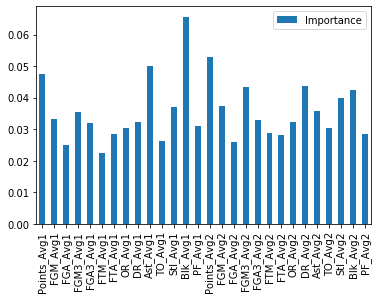

In [0]:
X_train = ncaa_train[['Points_Avg1', 'FGM_Avg1', 'FGA_Avg1', 'FGM3_Avg1', 'FGA3_Avg1', 'FTM_Avg1',
       'FTA_Avg1', 'OR_Avg1', 'DR_Avg1', 'Ast_Avg1', 'TO_Avg1', 'Stl_Avg1',
       'Blk_Avg1', 'PF_Avg1','Points_Avg2', 'FGM_Avg2', 'FGA_Avg2', 'FGM3_Avg2', 'FGA3_Avg2', 'FTM_Avg2',
       'FTA_Avg2', 'OR_Avg2', 'DR_Avg2', 'Ast_Avg2', 'TO_Avg2', 'Stl_Avg2',
       'Blk_Avg2', 'PF_Avg2']]
y_train = ncaa_train[['Results']]
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=99)
forest.fit(X_train, y_train) 
importances = forest.feature_importances_
importances

Attribute_importance = pd.DataFrame(importances,columns = ['Importance'], index = X_train.columns)
Attribute_importance.plot.bar()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


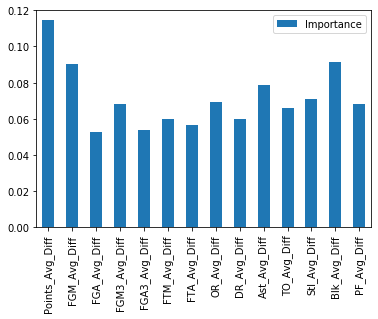

In [0]:
X_train_diff = ncaa_train[['Points_Avg_Diff', 'FGM_Avg_Diff',
       'FGA_Avg_Diff', 'FGM3_Avg_Diff', 'FGA3_Avg_Diff', 'FTM_Avg_Diff',
       'FTA_Avg_Diff', 'OR_Avg_Diff', 'DR_Avg_Diff', 'Ast_Avg_Diff',
       'TO_Avg_Diff', 'Stl_Avg_Diff', 'Blk_Avg_Diff', 'PF_Avg_Diff']]
forest.fit(X_train_diff, y_train) 
importances_diff = forest.feature_importances_
Attribute_importance_diff = pd.DataFrame(importances_diff,columns = ['Importance'], index = X_train_diff.columns)
Attribute_importance_diff.plot.bar()

In [0]:
X_test  = ncaa_test[['Points_Avg1', 'FGM_Avg1', 'FGA_Avg1', 'FGM3_Avg1', 'FGA3_Avg1', 'FTM_Avg1',
       'FTA_Avg1', 'OR_Avg1', 'DR_Avg1', 'Ast_Avg1', 'TO_Avg1', 'Stl_Avg1',
       'Blk_Avg1', 'PF_Avg1','Points_Avg2', 'FGM_Avg2', 'FGA_Avg2', 'FGM3_Avg2', 'FGA3_Avg2', 'FTM_Avg2',
       'FTA_Avg2', 'OR_Avg2', 'DR_Avg2', 'Ast_Avg2', 'TO_Avg2', 'Stl_Avg2',
       'Blk_Avg2', 'PF_Avg2']]
y_test = ncaa_test[['Results']]
X_test_diff = ncaa_test[['Points_Avg_Diff', 'FGM_Avg_Diff',
       'FGA_Avg_Diff', 'FGM3_Avg_Diff', 'FGA3_Avg_Diff', 'FTM_Avg_Diff',
       'FTA_Avg_Diff', 'OR_Avg_Diff', 'DR_Avg_Diff', 'Ast_Avg_Diff',
       'TO_Avg_Diff', 'Stl_Avg_Diff', 'Blk_Avg_Diff', 'PF_Avg_Diff']]

In [0]:
#KNN with all diff attributes: 
#Accuracy 0.5554 @k = 5 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier = KNeighborsClassifier(n_neighbors= 20 )
classifier.fit(X_train_diff, y_train)
y_pred = classifier.predict(X_test_diff)
metrics.accuracy_score(y_test, y_pred) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.5837912087912088

In [0]:
#KNN with importance higher than 0.08 
#Accuracy 0.5778 @ k = 5
X_train_diff1 = ncaa_train[['Points_Avg_Diff','Blk_Avg_Diff','FGM_Avg_Diff']]
X_test_diff1 = ncaa_test[['Points_Avg_Diff','Blk_Avg_Diff','FGM_Avg_Diff']]
classifier.fit(X_train_diff1, y_train)
y_pred1 = classifier.predict(X_test_diff1)
metrics.accuracy_score(y_test, y_pred1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5993589743589743

In [0]:
#RandomForest 
#Accuracy = 0.5833 @ n = 100
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train_diff,y_train)
y_pred_rf = rf.predict(X_test_diff)
metrics.accuracy_score(y_test, y_pred_rf)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5833333333333334

In [0]:
#RandomForest 
#Accuracy = 0.5769
rf.fit(X_train_diff1,y_train)
y_pred_rf1 = rf.predict(X_test_diff1)
metrics.accuracy_score(y_test, y_pred_rf1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.5769230769230769

In [0]:
#Decision Tree
#Accuracy 0.5366
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_diff,y_train)
y_pred_dt = dt.predict(X_test_diff)
metrics.accuracy_score(y_test, y_pred_dt)

0.5366300366300366

In [0]:
#Accuracy 0.5769
dt.fit(X_train_diff1,y_train)
y_pred_dt1 = rf.predict(X_test_diff1)
metrics.accuracy_score(y_test, y_pred_dt1)

0.5769230769230769

In [0]:
#SVM
#Accuracy 0.5636
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_diff,y_train)
y_pred_svm = svm.predict(X_test_diff)
metrics.accuracy_score(y_test, y_pred_svm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5636446886446886

In [0]:
#Accuracy 0.6003
svm.fit(X_train_diff1,y_train)
y_pred_svm1 = svm.predict(X_test_diff1)
metrics.accuracy_score(y_test, y_pred_svm1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6002747252747253